In [1]:
from IPython.display import Latex
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# Trabajo Práctico 1 - Felipe Sánchez
## Fundamentos matemáticos del procesamiento de señales

### Ejercicio 1 - Transformada de Fourier y representación frecuencial.

Usando las propiedades de la transformada de Fourier calcule la transformada de las sisguientes señales. Grafique la señal $x$ y el módulo de su transformada $|\hat{x}|$:
1) $x(t) = 2\sin (\omega_o t)$
2) $x(t) = 2\sin (2\omega_o t + 2/3)$
3) $x(t) = 2\cos(\omega_o t) +  \sin (\omega_0 t)$
4) $x(t) = 1$

#### Solución:

Para estos cálculos necesitamos tener presente las siguientes identidades:

$$\sin (x) = \dfrac{e^{ix}-e^{-ix}}{2i} \ \; \ \cos(x) = \dfrac{e^{ix}+e^{-ix}}{2}$$

junto con el siguiente resultado

$$\displaystyle\int_{\mathbb{R}}e^{i(\omega - \hat{\omega})t}d\omega = 2\pi \delta (\omega - \hat{\omega})$$

En efecto, desde la definición de la transformada de fourier y la fórmula de reconstrucción podemos identificar la siguiente igualdad

\begin{eqnarray*}
\hat{f}(\hat{\omega}) &=& \displaystyle\int_{\mathbb{R}}\dfrac{1}{2\pi}\displaystyle\int_{\mathbb{R}}\hat{f}(\omega)e^{i\omega t}d\omega e^{-i\hat{\omega}t}dt \\
&=& \dfrac{1}{2\pi}\displaystyle\int_{\mathbb{R}}\hat{f}(\omega)d\omega\displaystyle\int_{\mathbb{R}}e^{i(\omega - \hat{\omega})t}dt
\end{eqnarray*}

Ahora, utilizando propiedades de la delta de Dirac, podemos escribir

$$\hat{f}(\hat{\omega}) = \displaystyle\int_{\mathbb{R}}\hat{f}(\omega)\delta (\omega - \hat{\omega})d\omega$$

Reemplazando y reordenando convenientemente

$$\displaystyle\int_{\mathbb{R}}\hat{f}(\omega)\delta (\omega - \hat{\omega})d\omega = \displaystyle\int_{\mathbb{R}}\hat{f}(\omega)d\omega\cdot \dfrac{1}{2\pi}\displaystyle\int_{\mathbb{R}}e^{i(\omega - \hat{\omega})t}dt$$

Lo que nos entrega la igualdad enunciada en el sentido de las distribuciones.

*Para efectos de los gráficos, restringiremos al intervalo [$-\pi$,$\pi$]*

**1.-** $x(t) = 2\sin (\omega_0 t)$

Para calcular su transformada de Fourier, Luego de utilizar la fórmula de fourier y reordenando algebráicamente obtenemos

\begin{eqnarray*}
\hat{x}(\omega) &=& \displaystyle\int_{\mathbb{R}}2\sin (\omega_0 t)e^{-i\omega_0 t}dt\\
&=& \dfrac{1}{i}\displaystyle\int_{\mathbb{R}}\left( e^{-i(\omega - \omega_{0})t}- e^{-i(\omega + \omega_0)t}\right) dt \\
&=& 2\pi i (\delta(\omega +\omega_0) - \delta (\omega - \omega_0))
\end{eqnarray*}
Cuyo módulo es

$$|\hat{x}(\omega)| = 2\pi|\delta(\omega +\omega_0) - \delta (\omega - \omega_0)|$$

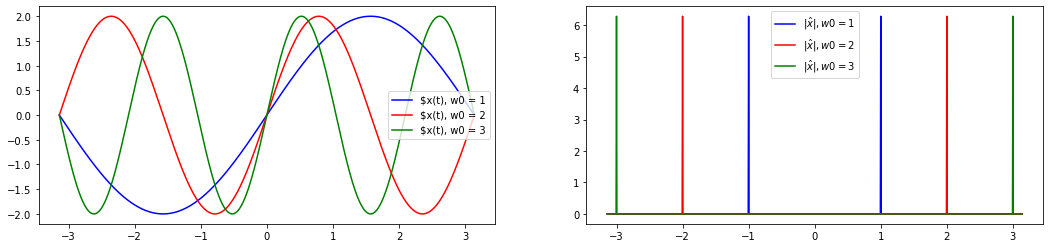

In [2]:
## Definimos nuestras variables para graficar
N = 2**10 + 1 # 1025
t = np.linspace(-np.pi,np.pi,N)
w = np.copy(t)
#Estos valores nos acompañarán por la primera parte del trabajo, luego los sobreescribiremos para trabajar en un intervalo más grande
# para probar diferentes datos de w_0, las escribiremos en un array de señales.
x = []
xhatmod = []
for w0 in [1,2,3]:
    n_w0 = int((np.pi+w0) * N/(2*np.pi))   # posición impulso positivo en la partición de largo N 
    minus_n_w0 = int((np.pi-w0) * N/(2*np.pi)) # posición impulso negativo en la partición de largo N
    np.array(x.append(2*np.sin(w0*t)))
    np.array(xhatmod.append(2*np.pi*abs(signal.unit_impulse(N, minus_n_w0) - signal.unit_impulse(N,n_w0))))
    
fig, ax = plt.subplots(1,2,figsize = (18,4))
o1 = ax[0].plot(t,x[0],'-b', label = '$x(t), w0 = 1')
o2 = ax[1].plot(w,xhatmod[0],'-b', label = '$|\hat{x}|, w0 = 1$')
o3 = ax[0].plot(t,x[1],'-r', label = '$x(t), w0 = 2')
o4 = ax[1].plot(w,xhatmod[1],'-r', label = '$|\hat{x}|, w0 = 2$')
o5 = ax[0].plot(t,x[2],'-g', label = '$x(t), w0 = 3')
o6 = ax[1].plot(w,xhatmod[2],'-g', label = '$|\hat{x}|, w0 = 3$')
ax[0].legend()
ax[1].legend();

**2.-** $x(t) = 2\sin (\omega_0 t+2/3)$

Utilizando las propiedades de la transformada de fourier y el cálculo realizado en el ejercicio anterior podemos calcular

\begin{eqnarray*}
\hat{x}(w) &=& 2\mathscr{F}(\sin (\omega_0 t + 2/3))(\omega)\\
&=& 2e^{\frac{2}{3}i\omega}\mathscr{F}(\sin (\omega_0 t))(\omega)\\
&=& 2\pi i (\delta (\omega + \omega_0) -\delta (\omega - \omega_0))e^{\frac{2}{3}i\omega}
\end{eqnarray*}

De donde

$$|\hat{x}(\omega)| = 2\pi |\delta (\omega + \omega_0) - \delta (\omega - \omega_0)|$$

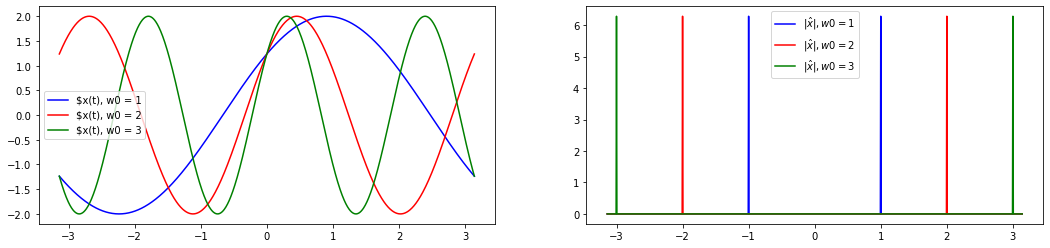

In [3]:
x = []
xhatmod = []
for w0 in [1,2,3]:
    n_w0 = int((np.pi+w0) * N/(2*np.pi))   # valores los impulsos en la gráfica
    minus_n_w0 = int((np.pi-w0) * N/(2*np.pi))
    np.array(x.append(2*np.sin(w0*t+2/3)))
    np.array(xhatmod.append(2*np.pi*abs(signal.unit_impulse(N, minus_n_w0) - signal.unit_impulse(N,n_w0))))
    
fig, ax = plt.subplots(1,2,figsize = (18,4))
o1 = ax[0].plot(t,x[0],'-b', label = '$x(t), w0 = 1')
o2 = ax[1].plot(w,xhatmod[0],'-b', label = '$|\hat{x}|, w0 = 1$')
o3 = ax[0].plot(t,x[1],'-r', label = '$x(t), w0 = 2')
o4 = ax[1].plot(w,xhatmod[1],'-r', label = '$|\hat{x}|, w0 = 2$')
o5 = ax[0].plot(t,x[2],'-g', label = '$x(t), w0 = 3')
o6 = ax[1].plot(w,xhatmod[2],'-g', label = '$|\hat{x}|, w0 = 3$')
ax[0].legend()
ax[1].legend();

**3.-** $x(t) = 2\cos(\omega_0 t) + \sin (\omega_0 t)$

Para realizar estos cálculos escribimos la señal de manera conveniente y usamos las propiedades de la transformada de fourier.

\begin{eqnarray*}
\hat{x}(\omega) &=& \dfrac{2}{\omega_0}\mathscr{F}\left( \dfrac{d}{dt}\sin (\omega_0 t)\right)(\omega) + \mathscr{F}(\sin (\omega_0 t))(\omega)\\
&=& \dfrac{2i\omega}{\omega_0}\mathscr{F}(\sin (\omega_0 t))(\omega) + \mathscr{F}(\sin (\omega_0 t))(\omega)\\
&=& \left( \dfrac{2i\omega +1}{\omega_0}\right)\pi i (\delta (\omega + \omega_0) - \delta (\omega -\omega_0))\\
&=& \left( \dfrac{\pi i - 2\pi\omega}{\omega_0}\right)(\delta (\omega + \omega_0)-\delta (\omega - \omega_0))
\end{eqnarray*}

Cuyo módulo está dado por

$$|\hat{x}(\omega)| = \dfrac{\pi\sqrt{4\omega ^{2}+1}}{\omega_0}|\delta (\omega +\omega_0)-\delta (\omega - \omega_0)|$$

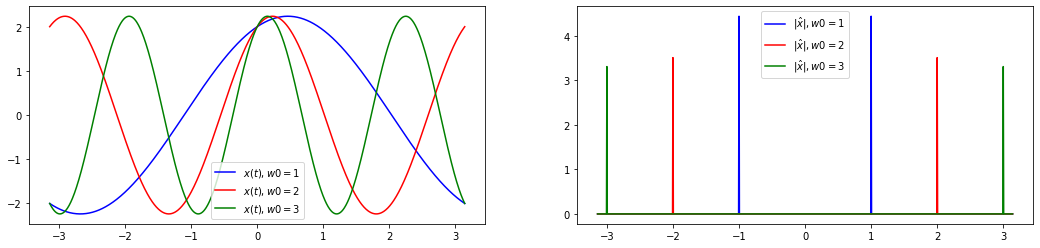

In [4]:
x = []
xhatmod = []
for w0 in [1,2,3]:
    n_w0 = int((np.pi+w0) * N/(2*np.pi))   # valores los impulsos en la gráfica
    minus_n_w0 = int((np.pi-w0) * N/(2*np.pi))
    np.array(x.append(2*np.cos(w0*t)+np.sin(w0*t)))
    np.array(xhatmod.append((np.pi*np.sqrt((w**2)+1)/w0)*abs(signal.unit_impulse(N, minus_n_w0) - signal.unit_impulse(N,n_w0))))
    
fig, ax = plt.subplots(1,2,figsize = (18,4))
o1 = ax[0].plot(t,x[0],'-b', label = '$x(t), w0 = 1$')
o2 = ax[1].plot(w,xhatmod[0],'-b', label = '$|\hat{x}|, w0 = 1$')
o1 = ax[0].plot(t,x[1],'-r', label = '$x(t), w0 = 2$')
o2 = ax[1].plot(w,xhatmod[1],'-r', label = '$|\hat{x}|, w0 = 2$')
o1 = ax[0].plot(t,x[2],'-g', label = '$x(t), w0 = 3$')
o2 = ax[1].plot(w,xhatmod[2],'-g', label = '$|\hat{x}|, w0 = 3$')
ax[0].legend()
ax[1].legend();

**4.-** $x(t)=1$

Para este cálculo, basta utilizar la definición de la transformada de fourier

$$\hat{x}(\omega) = \displaystyle\int_{\mathbb{R}}e^{-i\omega t}dt = \delta (\omega)$$

Con módulo $|\hat{x}(\omega)| = \delta(\omega)$

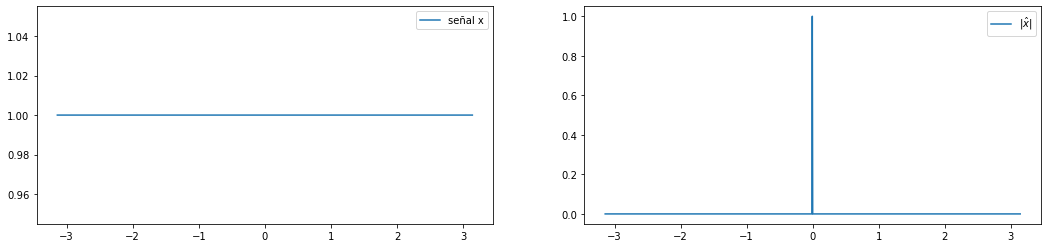

In [5]:
x = t**0
xhatmod = signal.unit_impulse(N,int(N/2)-1)

fig, ax = plt.subplots(1,2,figsize = (18,4))
o1 = ax[0].plot(t,x,label = 'señal x')
o2 = ax[1].plot(w,xhatmod, label = '$|\hat{x}|$')
ax[0].legend()
ax[1].legend();

### Ejercicio 2 -  Cálculo de la transformada de Fourier

Para las siguientes señales, grafique la señal, calcule la transformada de fourier de las siguientes señales y grafique su modulo. Cuando sea posible intente no calcular directamente la transformada.

1. $x(t) = e^{-at}\gamma (t)$ con $a>0$
2. $x(t) = e^{-a|t|}$ con $a>0$
3. $x(t) = \frac{1}{1+t^2}$
4. $x(t) = \frac{1}{2-2t+t^2}$
5. $x(t) = \frac{1}{(1+t^2)^2}$

En donde $\gamma (t)$ se corresponde con la función de Heaviside, definida por

 $$ \gamma (t) = \left \{
    \begin{aligned}
      1 &,\ \text{si} \ t > 0\\
      \frac{1}{2} &,\ \text{si} \ t=0 \\
      0 &,\ \text{otherwise} \
    \end{aligned}
  \right .$$
  
### Solución:

**1.-** $x(t) = e^{-at} \gamma (t)$

Nos disponemos a calcular su transformada de fourier

\begin{eqnarray*}
\hat{x}(\omega) &=& \displaystyle\int_{\mathbb{R}} e^{-at}\gamma (t) e^{-i\omega t}dt\\
&=& \displaystyle\int_{0}^{\infty} e^{-(a+i\omega)t}dt\\
&=& \left[\dfrac{e^{-(a+i\omega)t}}{-(a+i\omega)}\right]_{0}^{\infty}\\
&=& \dfrac{1}{a+i\omega}
\end{eqnarray*}

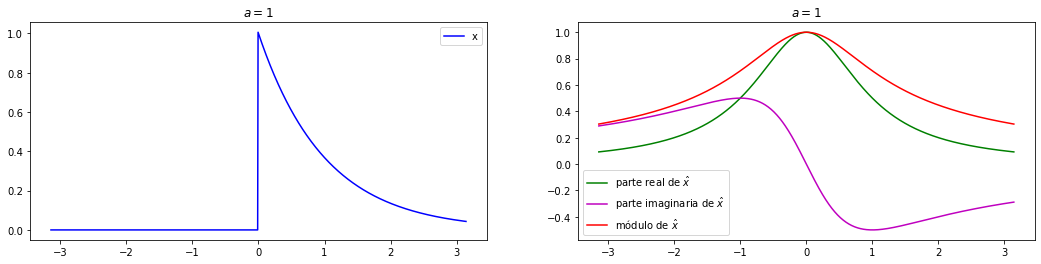

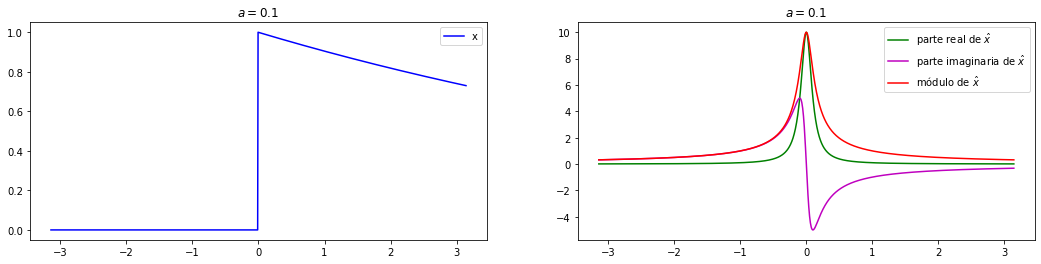

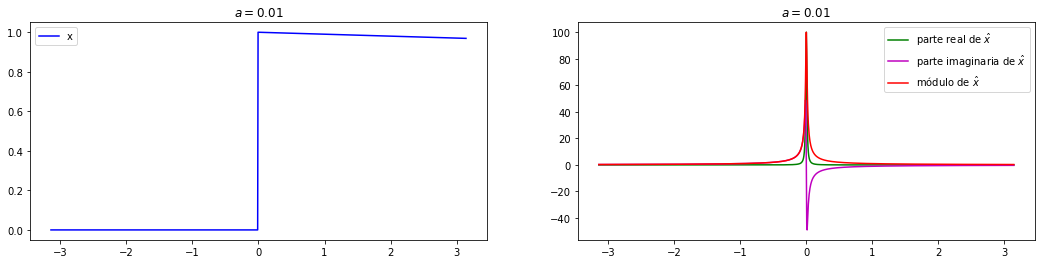

In [6]:
for a in [1,.1,.01]:
    x = np.exp(-a*t)
    x[:int(N/2)-1] = 0
    xhat = 1/(a+1j*w)
    
    fig, ax = plt.subplots(1,2,figsize = (18,4))
    o1 = ax[0].plot(t,x,'-b',label ='x')
    o2 = ax[1].plot(w,np.real(xhat), '-g', label = 'parte real de $\hat{x}$')
    o2 = ax[1].plot(w,np.imag(xhat),'m-', label = 'parte imaginaria de $\hat{x}$')
    o2 = ax[1].plot(w,np.abs(xhat), '-r', label = 'módulo de $\hat{x}$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')

**2.-** $x(t) = e^{-a|t|}$,  con $a>0$

Calculamos su transformada de fourier utilizando el resultado del problema anterior como sigue

\begin{eqnarray*}
\hat{x}(w) &=& \displaystyle\int_{\mathbb{R}}e^{-a|t|}e^{.i\omega t}dt\\
&=& \displaystyle\int_{-\infty}^{0}e^{at}e^{-i\omega t}dt + \displaystyle\int_{0}^{\infty}e^{-at}e^{-i\omega t}dt\\
&=& \left[ \dfrac{e^{(a-i\omega)t}}{a-i\omega}\right]_{-\infty}^{0} + \dfrac{1}{a+i\omega}\\
&=& \dfrac{1}{a-i\omega} + \dfrac{1}{a+i\omega}\\
&=& \dfrac{2a}{a^2 + \omega ^2}
\end{eqnarray*}

Grafiquemos estos resultados para distintos valores de $a$

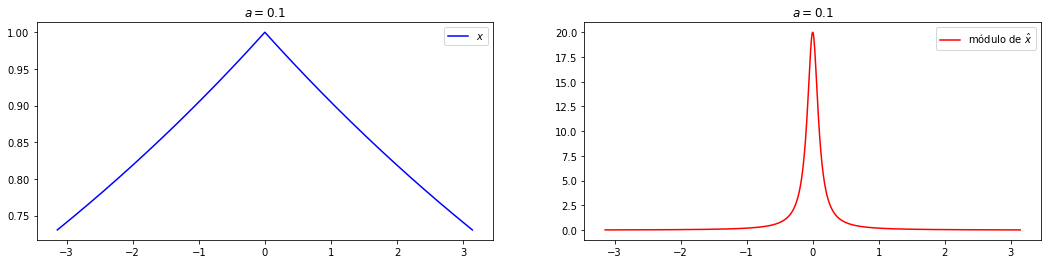

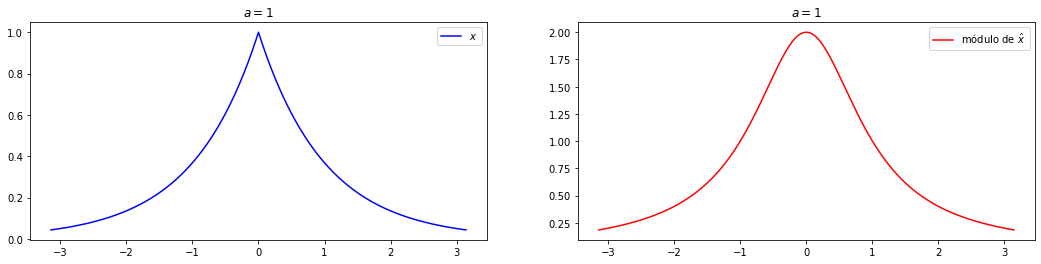

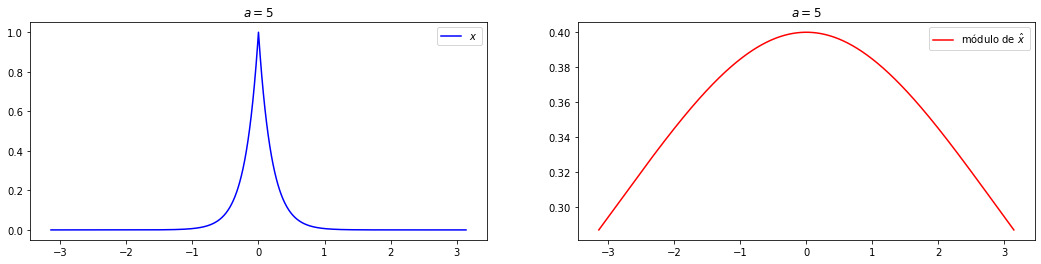

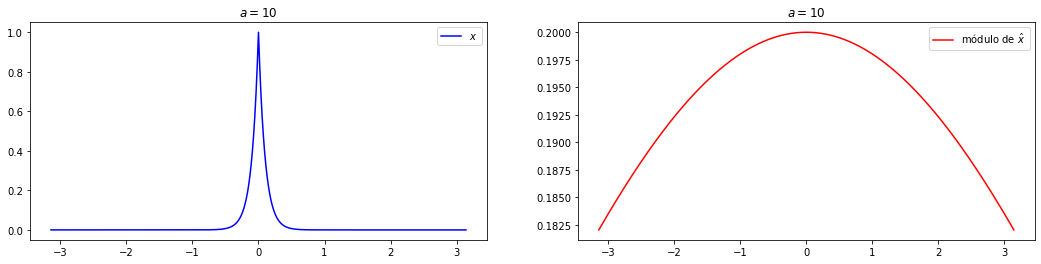

In [7]:
for a in [.1,1,5,10]:
    x = np.exp(-a*np.abs(t))
    xhat = (2*a)/(a**2 + w**2)
    
    fig, ax = plt.subplots(1,2,figsize = (18,4))
    
    o1 = ax[0].plot(t,x,'-b', label = '$x$')
    o2 = ax[1].plot(w,np.abs(xhat), 'r-',label = 'módulo de $\hat{x}$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')


**3.-** $x(t) = \dfrac{1}{1+t^2}$

Para este cálculo, haremos uso de la propiedad de simetría o dualidad de la transformada de Fourier

$$\hat{\hat{x}}(\overline{\omega}) = 2\pi x(-\omega)$$

y el resultado del problema anterior

$$\mathscr{F}\left( e^{-a|t|}\right)(\omega) = \dfrac{2a}{a^2 + \omega ^2}$$

Entonces, podemos formular

\begin{eqnarray*}
\mathscr{F}(x)(\omega) &=& \mathscr{F}\left(\dfrac{1}{1+t^2}\right)\\
&=& \dfrac{1}{2}\mathscr{F}\left( \dfrac{2}{1+t^2}\right)\\
&=& \dfrac{1}{2}\mathscr{F}\left(\mathscr{F}\left(e^{-|\overline{\omega}|}\right)\right)(\omega)\\
&=& \pi e^{-|\omega|}
\end{eqnarray*}

Con esto, procedemos a realizar las gráficas.

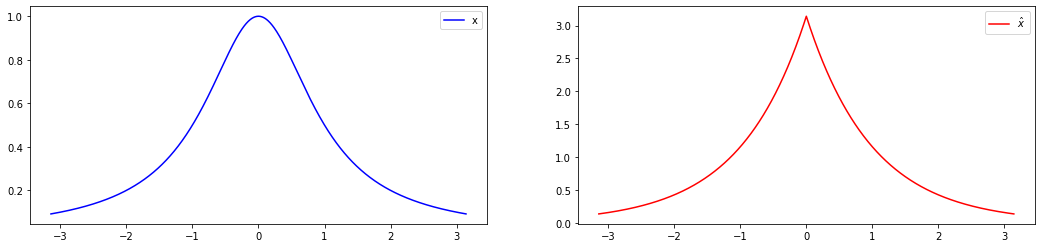

In [8]:
x = 1/(1+t**2)
xhat = np.pi * np.exp(-np.abs(w))

fig, ax = plt.subplots(1,2,figsize = (18,4))

o1 = ax[0].plot(t,x,'-b',label = 'x')
o2 = ax[1].plot(w,xhat,'-r',label = '$\hat{x}$')
ax[0].legend()
ax[1].legend();

**4.-** $x(t) = \dfrac{1}{2-2t+t^2}$

Esta transformada es calculada directamente, puesto que la podemos escribir convenientemente como

$$x(t) = \dfrac{1}{1+(t-1)^2}$$

Quedándonos

$$\hat{x}(\omega) = \pi e^{-|\omega -1|}$$

y graficamos entonces, notando que solo corresponde a desplazar la señal del ejercicio anterior.

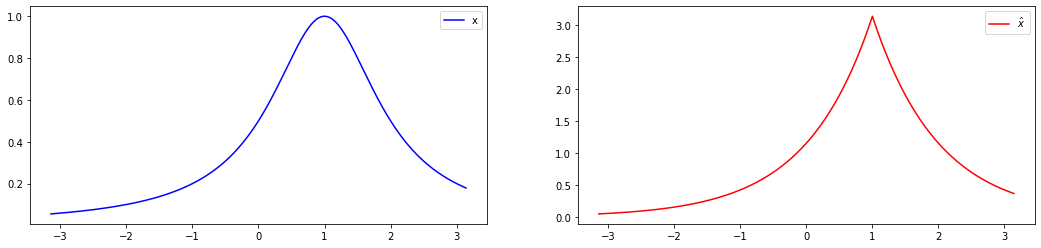

In [9]:
x = 1/(1+(t-1)**2)
xhat = np.pi * np.exp(-np.abs(w-1))

fig, ax = plt.subplots(1,2,figsize = (18,4))

o1 = ax[0].plot(t,x,'-b',label = 'x')
o2 = ax[1].plot(w,xhat,'-r',label = '$\hat{x}$')
ax[0].legend()
ax[1].legend();

**5.-** $x(t) = \dfrac{1}{(1+t^{2})^{2}}$

Nuevamente, podemos calcular directamente la transformada escribiendo convenientemente la señal como sigue

$$x(t) = \dfrac{1}{(1+t^{2})^{2}} = \dfrac{1}{t^4 +2t^2+1} = \dfrac{1}{1+t^2 (t^{2} +2)} = \dfrac{1}{1+( t\sqrt{t^{2} +2})^{2}}$$

Entregándonos que 

$$\hat{x}(\omega) = \pi e^{-|\omega \sqrt{\omega ^{2} +2}|}$$

Graficamos

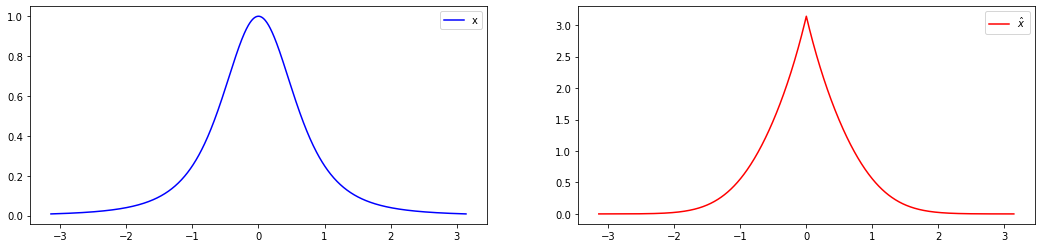

In [10]:
x = 1/(1+t**2)**2
xhat = np.pi * np.exp(-np.abs(w*(w**2 +2)**(1/2)))

fig, ax = plt.subplots(1,2,figsize = (18,4))

o1 = ax[0].plot(t,x,'-b',label = 'x')
o2 = ax[1].plot(w,xhat,'-r',label = '$\hat{x}$')
ax[0].legend()
ax[1].legend();

### Ejercicio 3 - Filtro medio

El filtro medio, parametrizado por $T>0$, calcula el promedio de la señal en una ventana deslizante de largo $T$. Su respuesta impulsional es la función rectangular definida por:

$$h(t) = \Pi _{T}(t-T/2)$$

En donde

 $$ \Pi _{T} (t) = \left \{
    \begin{aligned}
      \frac{1}{T} &,\ \text{si} \ |t| < \frac{T}{2}\\
      \frac{1}{2T} &,\ \text{si} \ |t|=\frac{T}{2} \\
      0 &,\ \text{otherwise} \
    \end{aligned}
  \right .$$
  
**1.-** Grafique la respuesta impusional y determine si es causal

En primer lugar, notamos que la respuesta impulsional es causal desde que podemos expresar esta por medio de la siguiente ecuación

 $$ h(t) = \left \{
    \begin{aligned}
      \frac{1}{T} &,\ \text{si} \ 0<t<T\\
      \frac{1}{2T} &,\ \text{si} \ t = 0 \ \text{v}\ t=T \\
      0 &,\ \text{otherwise} \
    \end{aligned}
  \right .$$
  
Obteniendo claramente que $h(t) = 0$ para todo $t<0$.

Con esto graficamos, esta vez, sobre el intervalo $[-4\pi , 4\pi]$ y considerando $T = \frac{\pi}{2}$.

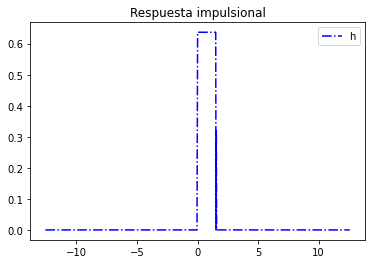

In [17]:
# Definición parámetros principales a usar
# En este momento sobreescribimos los valores del vector t y w a un intervalo más grande
N = 2**10 +1
t = np.linspace(-4*np.pi,4*np.pi,N)
w = np.copy(t)
T = np.pi/2 
# Creamos el la respuesta impulsional
h = np.zeros_like(t) # iniciamos un vector de cero del tamaño de t
n_zero = int(N/2) - 1 # posición 0
n = n_zero + int(T * N/(2*4*np.pi)) # posición T

h[n_zero] = 1/(2*T)
h[n] = 1/(2*T)
h[n_zero+1:n-1] = 1/T

# Ya con todo definido, graficamos
plt.plot(t,h,'b-.',label = 'h')
plt.legend()
plt.title('Respuesta impulsional');

**2.-** Calcule la salida del sistema lineal correspondiente, cuando la entrada es:

1. $x(t) = 1$
2. $x(t) = \gamma (t)$
3. $x(t) = \cos (\omega_0 t)$

**Solución:**
Calculamos las salidas por medio de las convoluciones de la señal con su respuesta impulsional

1. $\mathcal{L}[1](t) = \displaystyle\int_{-\infty}^{+\infty}1\cdot h(u)du = \displaystyle\int_{0}^{T}\dfrac{1}{T}dt = 1$.

2. $\mathcal{L}[\gamma](t) = \gamma (t)\ast h(t)=\displaystyle\int_{-\infty}^{+\infty}\gamma (t-u)h(u)du = \displaystyle\int_{0}^{T}\dfrac{1}{T}dt = 1 $

3. 
\begin{eqnarray*}
\mathcal{L}[\cos(\omega_0 t)](t) &=& \displaystyle\int_{-\infty}^{+\infty}\cos(\omega_0 (t-u))h(u)du\\
&=& \dfrac{1}{T}\displaystyle\int_{0}^{T} \cos(\omega_0 (t-u))du, \ \ v = \omega_0 (t-u)\\
&=& -\dfrac{1}{\omega_0 T}\displaystyle\int_{\omega_0 t}^{\omega_0 (t-T)}\cos(v)dv\\
&=& \dfrac{1}{\omega_0 T}(\sin(\omega_0 t)-\sin(\omega_0 (t-T)))
\end{eqnarray*}

**3.-** Exprese  la salida del sistema $x(t) = \cos (\omega_0 t)$ de la forma $y(t) = A(\omega_0)\cos (\omega_0 t +\phi (\omega_0))$.

**Solución:**

A partir de la igualdad obtenida anteriormente continuamos utilizando identidad trigonométrica de resta de senos.

\begin{eqnarray*}
\mathcal{L}[\cos (\omega_0 t)](t) = y(t)
&=& \dfrac{2}{\omega_0 T}\cos\left(\dfrac{2\omega_0 t - \omega_0 T}{2}\right)\sin\left(\dfrac{\omega_0 T}{2}\right)\\
&=& \underbrace{\sin c\left(\dfrac{\omega_0 T}{2}\right)}_{A(\omega_0)}\cos\left( \omega_0 t + \underbrace{-\dfrac{\omega_0 T}{2}}_{\phi (\omega_0)}\right)
\end{eqnarray*}


**4.-** Grafique $|A(\omega_0)|$ en función de $\omega_0$ para $T = 1$. Grafique también $\phi (\omega_0)$.

**Solución:**

Para $T=1$ nos queda entonces la siguiente salida para la señal $x(t) = \cos (\omega_0 t)$

$$y(t) = \sin c\left( \dfrac{\omega_0}{2}\right)\cos\left(\omega_0 t - \dfrac{\omega_0 T}{2}\right)$$

De donde $|A(\omega_0 )| = \left| \sin c\left(\dfrac{\omega_0}{2}\right)\right|$ y $\phi (\omega_0)=-\dfrac{\omega_0 }{2}$.

Graficamos entonces en función de $\omega_0$

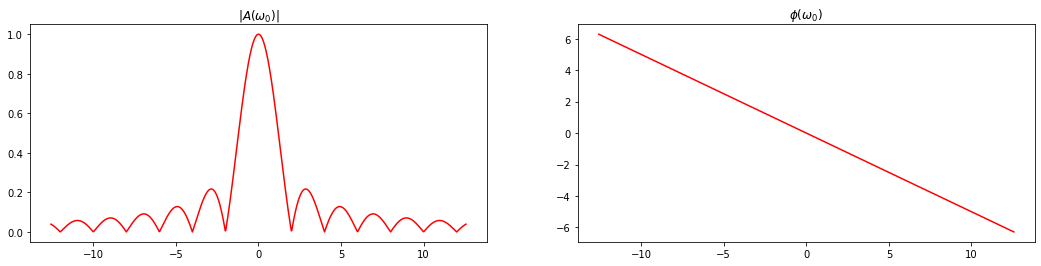

In [12]:
# Creamos nuestro vector de w_0 para analizar frecuencias en el intervalo [-4pi,4pi] y las funciones a graficar
w_0 = np.copy(w)
A = np.abs(np.sinc(w_0 / 2))
phi = -w_0 /2
# Graficamos

fig, ax = plt.subplots(1,2, figsize = (18,4))

o1 = ax[0].plot(w_0,A, 'r-')
o2 = ax[1].plot(w_0, phi, 'r-')
ax[0].set_title('$|A(\omega_0)|$')
ax[1].set_title('$\phi (\omega_0)$');



**5.-** Calcule la función de transferencia  del sistema $H(\omega)$. ¿ cuál es su relación con $A(\omega)$ y $\phi (\omega)$?

Nos disponemos a calcular la función de transferencia

\begin{eqnarray*}
H(\omega) &=& \displaystyle\int_{-\infty}^{+\infty} h(t)e^{-i\omega t}dt\\
&=& \dfrac{1}{T}\displaystyle\int_{0}^{T}e^{-i\omega t}dt\\
&=& -\dfrac{1}{i\omega T} \left[ e^{-i\omega t}\right] _{0}^{T}\\
&=& \dfrac{1- e^{-i\omega T}}{i\omega T}\\
&=& \dfrac{1-(\cos(\omega T)-i\sin(\omega T))}{i\omega T}\\
&=& \dfrac{1-\cos(\omega T)}{i\omega T} + \sin c(\omega T)\\
&=& \dfrac{-2i\sin(\omega T /2)}{\omega T} +\sin c(\omega T)\\
&=& \sin c(\omega T) - i\sin c(\omega T/2)
\end{eqnarray*}

Además, note que esta función de transferencia puede ser escrita directamente en función de la amplitud y la fase calculadas en el problema anterior.

$$H(\omega) = \sin c(-2\phi(\omega)) - A(\omega)i$$

Graficamos ahora $H(\omega)$ y $|H(\omega)|$ para $T=1$.


C:\Users\Felipe\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


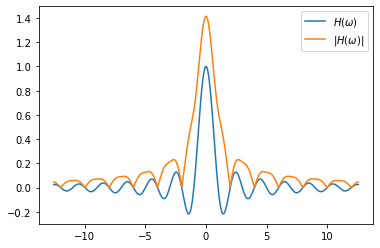

In [13]:
# Creamos los vectores con los valores de la función para T = 1
T = 1
H = np.sinc(w*T) -1j*np.sinc((w*T)/2)
Hmod = np.abs(H)

plt.plot(w,H,label = '$H(\omega)$')
plt.plot(w,np.abs(H), label = '$|H(\omega)|$')
plt.legend();

### Ejercicio 4a - Bode plot

Un diagrama de Bode es una representación gráfica que sirve para caracterizar la función de transferencia $H$ de un sistema, escribiendo la función de transferencia como 

$$H(\omega) = |H(\omega)|e^{i \arg (H(\omega))}$$

El diagrama consta de dos gráficas separadas, de ordenadas en escala logarítmica de $\omega$ expresada en radianes por segundo y de ordenadas:

* Magnitud (o ganancia) en decibeles (dB)

$$G(\omega) = 20\log _{10}(|H(\omega)|)$$

* Fase en grados

$$\Phi (\omega) = \arg (H(\omega)) = \tan ^{-1}\left( \dfrac{Im (H(\omega)) }{Re (H(\omega))}\right)$$

**1.-** Pruebe que si dos filtros $H_1(\omega)$  y $H_2(\omega)$ se encuentran conectados en serie (i.e, actúan uno después del otro sobre las señales entrantes), entonces el sistema es equivalente a

$$H(\omega) = H_1(\omega) \cdot H_2 (\omega)$$

y entonces se tiene que

\begin{eqnarray*}
G(\omega) = G_1 (\omega) + G_2 (\omega)\\
\Phi (\omega)  = \Phi _1 (\omega) + \Phi _2 (\omega)
\end{eqnarray*}

**Solución:** 

Consideremos $f\in L^2(\mathbb{R})$ y las respuestas impulsionales $h_1$ y $h_2$ asociados a los filtros 1 y 2 respectivamente. Luego, aplicamos los filtros en serie ($H_2$ seguido de $H_1$) desde el punto de vista del lado espectral.

\begin{eqnarray*}
\widehat{\mathcal{L}[f]}(\omega) &=& \widehat{h_2 \ast (h_1 \ast f)}\\
&=& H_2(\omega) (\widehat{h_1\ast f})\\
&=& H_1 (\omega)H_2 (\omega) \hat{f}
\end{eqnarray*}

De esta manera, el sistema de filtros en serie queda dado por la función de transferencia

$$H(\omega) = H_1(\omega)\cdot H_2(\omega)$$

Ahora, note que es directo de las propiedades del logaritmo 

\begin{eqnarray*}
G(\omega) &=& 20\log(|H(\omega)|)\\
&=& 20\log(|H_1(\omega)H_2(\omega)|)\\
&=& 20\log(|H_{1}(\omega)|)+ 20\log (|H_2(\omega)|)\\
&=& G_1(\omega) + G_2(\omega)
\end{eqnarray*}

Ahora, para probar la identidad de la fase, denotaremos por $|H_{i}(\omega)| = r_i$ y $\arg (H_{i}(\omega)) = \theta _i$ con $i\in\lbrace 1,2\rbrace$ y escribimos 

$$H_{1}(\omega) = r_1 (\cos(\theta_1) + i \sin (\theta_1))\ \ \;\ H_2 (\omega) = r_2(\cos (\theta_2)+i\sin (\theta_2))$$

Y estudiamos lo siguiente

\begin{eqnarray*}
H_1(\omega)H_2(\omega) &=& r_1r_2(\cos(\theta_1)+i\sin (\theta_1))(\cos(\theta_2) + i\sin(\theta_2))\\
&=& r_1r_2(\cos(\theta_1)\cos (\theta_2) - \sin (\theta_1)\sin (\theta_2)+(\cos(\theta_1)\sin(\theta_2)+\cos(\theta_2)\sin(\theta_1))i)\\
&=& r_1r_2(\cos(\theta_1 +\theta_2) + i\sin(\theta_1 + \theta_2))
\end{eqnarray*}

De esta forma $\arg (H_1(\omega)H_2(\omega))= \arg (H_1) + \arg (H_2)$ y determinamos que $\Phi (\omega) = \Phi_1(\omega)+\Phi_2(\omega)$.

**2.-** Pruebe de la misma manera, que si $H(\omega)=H_1(\omega)/H_2(\omega)$, entonces se tiene que 

\begin{eqnarray*}
G(\omega) = G_1(\omega) -G_2(\omega)\\
\Phi (\omega) = \Phi_1 (\omega) - \Phi_2 (\omega)
\end{eqnarray*}

e indique para qué tipo de sistema visto en clases esto es particularmente útil.

**Solución:** La propiedad de la magnitud, es absolutamente equivalente a la parte anterior escribiendo $H_1(\omega)/H_2(\omega) = H_1(\omega)H_2(\omega)^{-1}$. por otro lado, para la fase, de forma análoga a la anterior calculamos como sigue

\begin{eqnarray*}
\dfrac{H_1(\omega)}{H_2(\omega)} &=&\dfrac{r_1}{r_2}\cdot\dfrac{\cos(\theta_1) + i\sin(\theta_1)}{\cos(\theta_2) + i\sin(\theta_2)}\cdot\dfrac{\cos(\theta_2)-i\sin(\theta_2)}{\cos(\theta_2)-i\sin(\theta_2)}\\
&=& \dfrac{r_1}{r_2}\left( \cos(\theta_1)\cos(\theta_2) + \sin(\theta_1)\sin(\theta_2) +i(\sin(\theta_1)\cos(\theta_2)-\sin(\theta_2)\cos(\theta_1))\right)\\
&=& \dfrac{r_1}{r_2}\left( \cos(\theta_1 -\theta_2) + i\sin(\theta_1 -\theta_2)\right)
\end{eqnarray*}

Así, $\arg (H_1(\omega) / H_2 (\omega)) = \arg (H_1(\omega)) - \arg(H_2 (\omega))$ y así, $\Phi (\omega) = \Phi_1 (\omega) - \Phi_2 (\omega)$.

**Ejercicio 4b - Respuesta frecuencial de sistemas eléctricos**

**1.-** Para el sistema eléctrico enunciado, calcule la función de transferencia del sistema en función de $\omega_0 = 1/RC$ donde $R$ es el valor de la resistencia $C$ el valor del capacitor.

![title](sise_1.png)


**Solución:** Siendo $x(t)$ e $y(t)$ la entrada y salida del sistema respectivamente, sabemos que la ecuación diferencial que rige el sistema eléctrico enunciado está dado por

$$RCy'(t) + y(t) = x(t)$$

En donde $x(t) = Ri(t) + y(t)$ e $y(t) = \dfrac{1}{C}\displaystyle\int_{-\infty}^{t}i(v)dv$. Además supondremos que la señal es causal y que el sistema inicialmente está en reposo, i.e $y'(0) = 0$.

Por otro lado, conocemos que $y(t) = x(t)\ast h(t)$. Que, estudiandolo en el lado espectral nos queda

\begin{eqnarray*}
\hat{y}(\omega) &=& \widehat{x(t)\ast h(y)}(\omega)\\
&=& \hat{y}(\omega) = \hat{x}(\omega)\hat{h}(\omega)
\end{eqnarray*}
Quedándonos que $\hat{h} = \dfrac{\hat{y}(\omega)}{\hat{x}(\omega)}$, la función de transferencia.

Ahora, aplicamos la transformada de Fourier a la edo asociada

\begin{eqnarray*}
\hat{x}(\omega) &=& RC\hat{y'}(\omega) + \hat{y}(\omega)\\
&=& i\omega RC\hat{y}(\omega) + \hat{y}(\omega)\\
&=& \hat{y}(\omega) (1+i\omega RC)
\end{eqnarray*}

Obteniendo $\dfrac{\hat{y}(\omega)}{\hat{x}(\omega)}=\dfrac{1}{1+i\omega RC}$.

As\'i, la función de transferencia en función de la frecuencia de corte $\omega_0 = \dfrac{1}{RC}$ nos queda

$$H(\omega) = \hat{h}(\omega) = \dfrac{1}{1+i\dfrac{\omega}{\omega_0}}$$


**2.-** Grafique el diagrama de Bode del sistema eléctrico presentado y discuta sobre el tipo de filtro implementado.

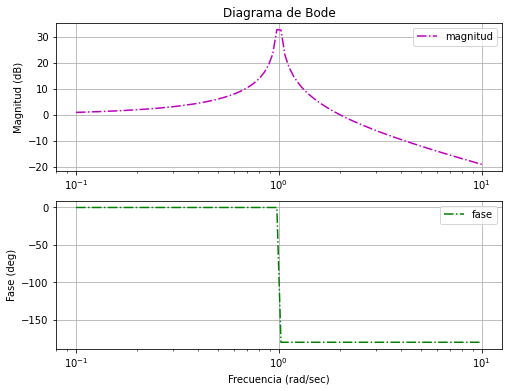

In [14]:
## Supondremos que R=C=1 ##
R=1
C=1
w_cero = 1/(R*C)

#Ingresamos nuestra función de transferencia
sys = signal.TransferFunction([1],[1j/w_cero,1])
#Traemos datos para diagrama de Bode asociada a la función de transferencia ingresada
w, mag, phase = signal.bode(sys)
#Graficamos
fig, ax = plt.subplots(2, 1,figsize=(8,6))
ax[0].semilogx(w, mag, 'm-.',  label='magnitud')
ax[1].semilogx(w, phase, 'g-.',  label='fase')
ax[0].set_title('Diagrama de Bode')
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('Magnitud (dB)')
ax[1].legend()
ax[1].set_ylabel('Fase (deg)')
ax[1].set_xlabel('Frecuencia (rad/sec)')
ax[1].grid()

Observamos desde la gráfica de la magnitud (Ganancia) que se trataría de un filtro _band-pass_ debido a que deja pasar frecuencias en una vecindad de la frecuencia de corte $\omega_0$ (a nuestro deseo para crear filtros de este estilo) y atenua las frecuencias fuera de esta vecindad.

**3.-** Para el siguiente sistema eleéctrico, calcule la función de transferencia del sistema en función de la frecuencia natural del sistema $\omega_n = 1/\sqrt{LC}$ y el amortiguamiento $z = R/2 \cdot \sqrt{C/L}$, donde $L$ es el valor de la inductancia.

![title](sise_2.png)

**Solución:** Ya sabemos que la función de transferencia está dada por 

$$\hat{h}(\omega) = \dfrac{\hat{y}(\omega)}{\hat{x}(\omega)}$$

y que la ecuación diferencial que modela el sistema eléctrico presentado es la siguiente

$$y''(t) +2z\omega_{n}y'(t) + \omega_{n}^{2}y(t)=k\omega_{n}^{2}x(t)$$

Encontremos la función de transferencia entonces aplicando transformada de Fourier a la ecuación del sistema.

\begin{eqnarray*}
k\omega_{n}^{2}\hat{x}(\omega) &=& \hat{y''}(\omega) +2z\omega_{n}\hat{y'}(\omega) + \omega_{n}^{2} \hat{y}(\omega)\\
&=& -\omega^{2}\hat{y}(\omega) + 2z\omega_{n}\omega i \hat{y}(\omega) +\omega_{n}^{2}\hat{y}(\omega)\\
&=& \hat{y}(\omega) (\omega_{n}^{2} +  2z\omega_{n}^{2}\omega i -\omega^{2})
\end{eqnarray*}

De esta manera, determinamos que la función de transferencia del sistema es 

$$\hat{h}(\omega) = \dfrac{\hat{y}(\omega)}{\hat{x}(\omega)} = \dfrac{k\omega_{n}^{2}}{\omega_{n}^{2} + 2z\omega_{n}\omega i - \omega^{2}}$$

**4.-** Grafique el diagrama de Bode del sistema eléctrico para $z = 0.5, 1, 1.5$ y discuta sobre el tipo de filtro implementado.

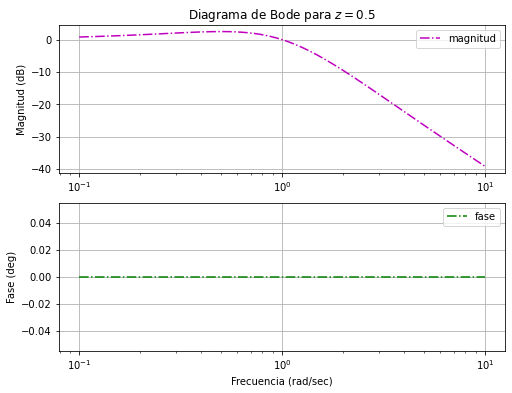

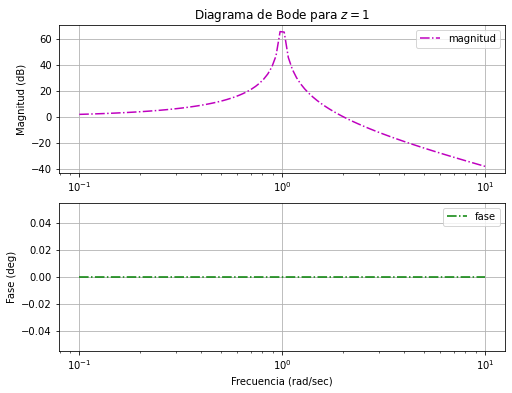

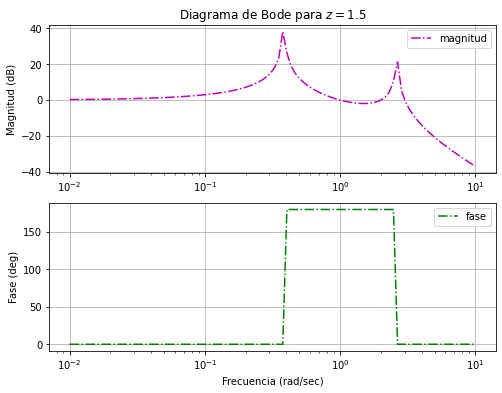

In [15]:
# para efectuar la gráfica supondremos que w_n = k = 1
w_n = 1
k = 1
# Ingresamos nuestra función de transferncia para los valores de z = 0.5, 1, 1.5
for z in [0.5,1,1.5]:
    sys = signal.TransferFunction([k*w_n**2],[-1,1j*2*z*w_n,w_n**2])
    w, mag, phase = signal.bode(sys)
    
    fig, ax = plt.subplots(2, 1,figsize=(8,6))
    ax[0].semilogx(w, mag, 'm-.',  label='magnitud')
    ax[1].semilogx(w, phase, 'g-.',  label='fase')
    ax[0].set_title(f'Diagrama de Bode para $z = {z}$')
    ax[0].legend()
    ax[0].grid()
    ax[0].set_ylabel('Magnitud (dB)')
    ax[1].legend()
    ax[1].set_ylabel('Fase (deg)')
    ax[1].set_xlabel('Frecuencia (rad/sec)')
    ax[1].grid()
   

Podemos hacer distinciones del tipo del filtro dependiendo de z

* para z = 0.5 se trataría de un filtro del tipo _low-pass_ dado a que deja pasar frecuencias bajas hasta la frecuencia de corte, en donde comienza a atenuar las frecuencias más grandes.

* para z = 1 estamos en presencia de un filtro _band-pass_ bajo los mismos argumentos del problema anterior.

* para z = 1.5 nos encontramos con un una composición (suma) de filtros _band-pass_, dejando pasar frecuencias en una vecindad de $\omega$ y $-\omega_0$.

### Ejercicio 5 - Deseño de filtro 

La función de transferencia de un filtro de Butterworth de orden $n$ satisface

$$|H(\omega)|^{2} = \dfrac{1}{1+\left(\dfrac{\omega}{\omega_c}\right)^{2n}}$$

donde $\omega_c$  es la frecuencia de corte del filtro.


**1.-** Grafique la primera parte (Magnitud) del diagrama de Bode para diferentes valores de n.

Note que 

$$|H(\omega)| = \dfrac{1}{\sqrt{1+\left(\dfrac{\omega}{\omega_c}\right)^{2n}}}$$

Quedándonos la magnitud definida como 

$$G(\omega) = -10\log \left( 1+\left(\dfrac{\omega}{\omega_c}\right)^{2n}\right)\to 0,\ \omega \to 0$$

Además, cuando $\omega = \omega_c$ tendremos
$$G(\omega) =  -10\log (2) = -3dB$$

atenuando el espectro de una señal en $-3dB$ en la frecuencia de corte.

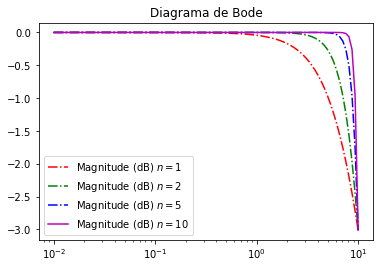

In [16]:
# Graficaremos para distintos valores de n

w_c = 10
color = {'1':'r-.', '2': 'g-.', '5':'b-.', '10':'m-'}
for n in [1,2,5,10]:
    
    G = np.array(-10*np.log10(1+(w/w_c)**(2*n)))         
    plt.semilogx(w,G,color[str(n)],label = f'Magnitude (dB) $n={n}$')
    plt.title('Diagrama de Bode')
    plt.legend()
    plt.grid()

**2,-** Nuestro objetivo es diseñar un filtro que respete las restricciones de la figura mostrada usando la expresión de la función de transferencia del problema anterior. Cálculo el mínimo orden del filtro (En función de $\omega_c ,\omega_a$ y  $a$) para que las restricciones sean respetadas.

![title](restriccion.png)

Notamos para el diseño de este filtro, que la atenuación mínima es de $-3dB$ y atenuación máxima de $a\ dB$ en las frecuencias $\omega_c$ y $\omega_a$ respectivamente. Luego, reemplazando en nuestra función de magnitud $G(\omega)$, tendremos las siguientes ecuaciones

\begin{eqnarray*}
\lbrace
\begin{matrix}
a = -10\log\left(1+\left(\dfrac{\omega_a}{\omega_c}\right)^{2n}\right)\\
-3 = -10\log\left(1+\left(\dfrac{\omega_c}{\omega_c}\right)^{2n}\right)
\end{matrix}
\rbrace\\
=\lbrace
\begin{matrix}
10^{-a/10} = 1+ \left(\dfrac{\omega_a}{\omega_c}\right)^{2n}\\
10^{3/10} = 1+\left(\dfrac{\omega_c}{\omega_c}\right)^{2n}
\end{matrix}
\rbrace\\
=
\lbrace
\begin{matrix}
\left(\dfrac{\omega_a}{\omega_c}\right)^{2n} = 10^{a/10}-1\\
\left(\dfrac{\omega_c}{\omega_c}\right)^{2n} = 10^{-3/10}-1
\end{matrix}
\rbrace
\end{eqnarray*}

Luego, dividiendo estas expresiones y tomando logaritmo obtenemos

$$2n\log\left(\dfrac{\omega_a}{\omega_c}\right) = \log\left(\dfrac{10^{3/10}-1}{10^{-a/10}-1}\right)$$

concluyendo finalmente que el orden del filtro debe ser

$$n = \dfrac{\log\left(\dfrac{10^{3/10}-1}{10^{-a/10}-1}\right)}{2\log\left(\dfrac{\omega_a}{\omega_c}\right)}$$

note que el número $n$ calculado puede ser un número racional, por lo que el orden mínimo del filtro con las restricciones propuestas es el número natural cercano a $n$